# Homework 04 :Nonparametric Regression
## Kerem Aksoy

Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

Importing the data

In [ ]:
data_set = np.genfromtxt("hw04_data_set.csv", delimiter = ",")
#First row is titles for coloumns so we need to be careful about it
#Dividing the dataset into two one for testing, one for training
x_train = data_set[1:151,0]
y_train = data_set[1:151,1]

x_test = data_set[151:,0] 
y_test = data_set[151:,1]

#150 for training
#122 for test

Parameters for regressogram

In [ ]:
bin_width = 0.37
origin = 1.5

upper_bound = max(np.max(x_train),np.max(x_test)); #Finding maximum x value along all dataset as upper bound

data_interval = np.linspace(origin, upper_bound, 1601)
left_borders = np.arange(origin,upper_bound, bin_width)
right_borders = np.arange(origin + bin_width, upper_bound + bin_width, bin_width)


**Learning a regressogram**

In [ ]:
# Counting number of Xi's which is inside of a bin, storing them in an array one by one
numberOfXis= np.asarray([np.sum((left_borders[b] < x_train) & (x_train <= right_borders[b])) for b in range(len(left_borders))])
#Taking the mean of regressogram(waiting) values for each bin and storing them in an array
reg_values = np.asarray([np.sum(y_train[((left_borders[b] < x_train) & (x_train <= right_borders[b]))]) for b in range(len(left_borders))]) / numberOfXis #Elementwise division


Plotting The data And Regressogram

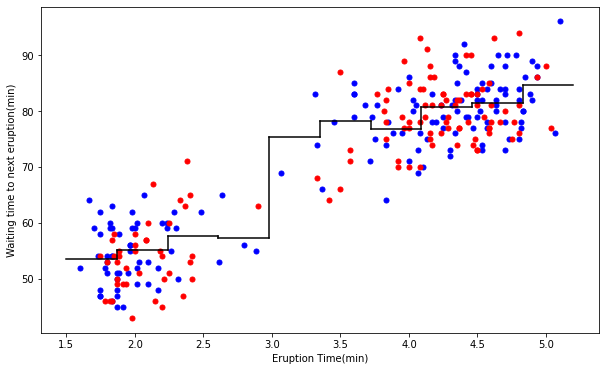

In [ ]:
plt.figure(figsize = (10, 6))

plt.plot(x_train,y_train,"b.",markersize=10) #Plotting training set
plt.plot(x_test,y_test,"r.",markersize=10) #Plotting test set
for i in range(len(left_borders)): #Horizantal
    plt.plot([left_borders[i], right_borders[i]], [reg_values[i], reg_values[i]], "k-")
for k in range(len(left_borders) - 1): #Drawing vertical lines(changes in bin borders)
    plt.plot([right_borders[k], right_borders[k]], [reg_values[k], reg_values[k+1]], "k-")
plt.ylabel("Waiting time to next eruption(min)")
plt.xlabel("Eruption Time(min)")
plt.show()

Calculating the root mean squared error (RMSE) for Regressogram

In [ ]:
total = 0;
for bin in  range(len(left_borders)):
  insideBin = (left_borders[bin] < x_test) & (x_test <= right_borders[bin]) #Taking the indexes of the data points inside the bin
  total+=np.sum((y_test[insideBin]-reg_values[bin])**2) #summing the squared error for each point and summing them up
rmse = math.sqrt(total / len(y_test)) #Calculating final root mean squared error
print("Regressogram => RMSE is {} when h is {}".format(rmse,bin_width))

Regressogram => RMSE is 5.962617204275405 when h is 0.37


**Learning Running Mean Smoother**

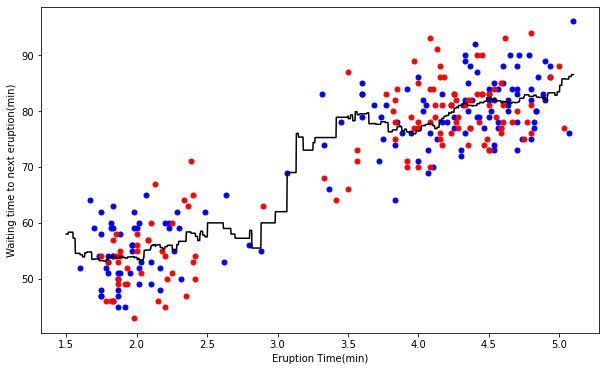

In [ ]:
#Learning for each x in the data_interval
gX_meanSmoother = np.asarray([np.sum(y_train[(np.abs(x-x_train)/bin_width)<0.5])/(np.sum((np.abs(x-x_train)/bin_width)<0.5)) for x in data_interval])

#Plotting running mean smoother
plt.figure(figsize = (10, 6))
plt.plot(x_train,y_train,"b.",markersize=10) #Plotting training set
plt.plot(x_test,y_test,"r.",markersize=10) #Plotting test set
plt.plot(data_interval, gX_meanSmoother, "k-") #Plotting g_meanSmoother

plt.ylabel("Waiting time to next eruption(min)")
plt.xlabel("Eruption Time(min)")
plt.show()

Calculating the root mean squared error (RMSE) for Running mean smoother

In [ ]:
# Calculating the running mean smoother's predictions of each x_test values
rms_predict = np.asarray([np.sum(y_train[(np.abs(x-x_train)/bin_width)<0.5])/(np.sum((np.abs(x-x_train)/bin_width)<0.5)) for x in x_test])

#Calculating the rmse of running mean smoother accordingly wtih predictions
rmseOFrunningMS = math.sqrt(np.sum((y_test-rms_predict)**2)/len(y_test))
print("Running Mean Smoother => RMSE is {} when h is {}".format(rmseOFrunningMS,bin_width))

Running Mean Smoother => RMSE is 6.089003211720321 when h is 0.37


**Learning Kernel Smoother**

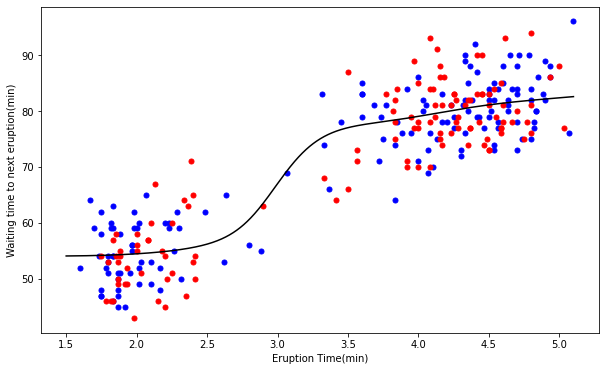

In [ ]:
gX_kernelSmoother = []
for i in range(len(data_interval)):
  x = data_interval[i]
  Ku_of_x = ( 1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * ((x-x_train)/bin_width)**2))
  gX_of_x = np.sum(Ku_of_x*y_train) / np.sum(Ku_of_x) #Dividing by sum of all Ku results
  gX_kernelSmoother.append(gX_of_x)


#Plotting running mean smoother
plt.figure(figsize = (10, 6))
plt.plot(x_train,y_train,"b.",markersize=10) #Plotting training set
plt.plot(x_test,y_test,"r.",markersize=10) #Plotting test set
plt.plot(data_interval, gX_kernelSmoother, "k-") #Plotting g_meanSmoother

plt.ylabel("Waiting time to next eruption(min)")
plt.xlabel("Eruption Time(min)")
plt.show()

Calculating the root mean squared error (RMSE) for Kernel Smoother

In [ ]:
kernel_predict = []
for i in range(len(x_test)):
  x = x_test[i]
  Ku_of_x = ( 1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * ((x-x_train)/bin_width)**2))
  pred_X = np.sum(Ku_of_x*y_train) / np.sum(Ku_of_x)
  kernel_predict.append(pred_X)
rmse_kernel = math.sqrt(np.sum((y_test-kernel_predict)**2)/len(y_test))

print("Kernel Smoother => RMSE is {} when h is {}".format(rmse_kernel,bin_width))

Kernel Smoother => RMSE is 5.874362846844967 when h is 0.37
